In [3]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\RequirePackage[libertine]{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

In [4]:
# Replace this variable accordingly 
path_to_results = "../experiments/2019-11-01-20-29_PerformanceIndex_/"

In [5]:
masterdata = pd.read_csv(path_to_results + "PerformanceIndex.csv")

In [6]:
masterdata.head(10)

,refId,indexId,w,initcpu,cpu,rcpu,rep
0,independent-i-3-0.0-gaussian-0,CRankStream,100,8.947022,2.547006,2.019048,0
1,independent-i-3-0.0-gaussian-10,Count,100,5.965897,1.654423,0.020068,0
2,independent-i-3-0.0-gaussian-0,Rank,100,9.015890,4.170240,0.042980,0
3,independent-i-3-0.0-gaussian-0,CRank,100,8.223802,4.944673,0.046868,0
4,independent-i-3-0.0-gaussian-10,CountStream,100,7.431198,1.001258,2.586661,0
5,independent-i-3-0.0-gaussian-0,RankStream,100,8.769655,2.219123,1.595872,0
6,independent-i-3-0.0-gaussian-0,Rank,100,8.856760,5.360874,0.030467,51
7,independent-i-3-0.0-gaussian-0,CRankStream,100,7.317764,0.794169,2.389771,44
8,independent-i-3-0.0-gaussian-0,Rank,100,5.174523,7.630639,0.041708,82
9,independent-i-3-0.0-gaussian-0,RankStream,100,15.647134,1.376301,1.200521,26


In [7]:
# clean burn-in
masterdata= masterdata[masterdata["rep"] != 0]

In [8]:
masterdata_init = masterdata[["init" in x for x in masterdata["refId"]]]
masterdata = masterdata[["init" not in x for x in masterdata["refId"]]]

In [9]:
masterdata.groupby(["indexId", "w"]).count()

refId  initcpu  cpu  rcpu  rep
indexId    w                                     
CRank      100       100      100  100   100  100
           200       100      100  100   100  100
           300       100      100  100   100  100
           400       100      100  100   100  100
           500       100      100  100   100  100
...                  ...      ...  ...   ...  ...
RankStream 99600     100      100  100   100  100
           99700     100      100  100   100  100
           99800     100      100  100   100  100
           99900     100      100  100   100  100
           100000    100      100  100   100  100

[6000 rows x 5 columns]

In [10]:
# simplify the refIds
extract = [x.split("-")[1:4] + [x.split("-")[5]] for x in masterdata["refId"]]
extract = [["ic"]+x[1::] if(x[0]=="independentcat") else x for x in extract]
extract = [["lc"]+x[1::] if(x[0]=="linearcat") else x for x in extract]
masterdata["refId"] = ["-".join(x) for x in extract]

extract = [x.split("-")[1:4] + [x.split("-")[5]] for x in masterdata_init["refId"]]
extract = [["ic"]+x[1::] if(x[0]=="independentcat") else x for x in extract]
extract = [["lc"]+x[1::] if(x[0]=="linearcat") else x for x in extract]
masterdata_init["refId"] = ["-".join(x) for x in extract]

In [11]:
masterdata["refId"].unique()

array(['i-3-0.0-0', 'i-3-0.0-10'], dtype=object)

In [13]:
masterdata.head()

,refId,indexId,w,initcpu,cpu,rcpu,rep
6,i-3-0.0-0,Rank,100,8.856760,5.360874,0.030467,51
7,i-3-0.0-0,CRankStream,100,7.317764,0.794169,2.389771,44
8,i-3-0.0-0,Rank,100,5.174523,7.630639,0.041708,82
9,i-3-0.0-0,RankStream,100,15.647134,1.376301,1.200521,26
10,i-3-0.0-0,RankStream,100,15.987021,1.581947,1.309506,64


In [14]:
indexId = 'i-1-0.0-20'
w = 10000
subdata = masterdata[masterdata['w'] == w]
subdata.groupby(["indexId", "refId"]).mean()

,,w,initcpu,cpu,rcpu,rep
indexId,refId,,,,,
CRank,i-3-0.0-0,10000.0,112.461073,115.343472,0.029373,50.5
CRankStream,i-3-0.0-0,10000.0,92.806947,1.159347,28.864514,50.5
Count,i-3-0.0-10,10000.0,134.639146,138.813976,0.030980,50.5
CountStream,i-3-0.0-10,10000.0,157.843959,1.153028,3.485814,50.5
Rank,i-3-0.0-0,10000.0,69.053981,74.848018,0.019566,50.5
RankStream,i-3-0.0-0,10000.0,88.136198,1.107508,3.117962,50.5


In [15]:
dict_corres = {
    "CRank" : "i-1-0.0-0",
    "CRankStream" : "i-1-0.0-0",
    "Count" : "i-1-0.0-10",
    "CountStream" : "i-1-0.0-10",
    "Rank" : "i-1-0.0-0",
    "RankStream" : "i-1-0.0-0",
}

In [16]:
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)

In [17]:
styledictionary = {
    'Count': {'marker': 'o', 'color': reds5[1], 'linestyle': "-"},
    'CountStream*': {'marker': 'D', 'color': purples5[1], 'linestyle': "-"},
    'CountStream': {'marker': 's', 'color': blues5[1], 'linestyle': "-"},
    'CRank': {'marker': 'o', 'color': reds5[1], 'linestyle': "-"},
    'CRankStream*': {'marker': 'D', 'color': purples5[1], 'linestyle': "-"},
    'CRankStream': {'marker': 's', 'color': blues5[1], 'linestyle': "-"},
    'Rank': {'marker': 'o', 'color': reds5[1], 'linestyle': "-"},
    'RankStream*': {'marker': 'D', 'color': purples5[1], 'linestyle': "-"},
    'RankStream': {'marker': 's', 'color': blues5[1], 'linestyle': "-"},
}

In [18]:
prettynames = {
    "Rank" : "KSP index",
    "CRank": "MWP index",
    "Count": "CSP index"
}

## Figure 7:   Time required for index construction and update w.r.t. window size w

<IPython.core.display.Javascript object>


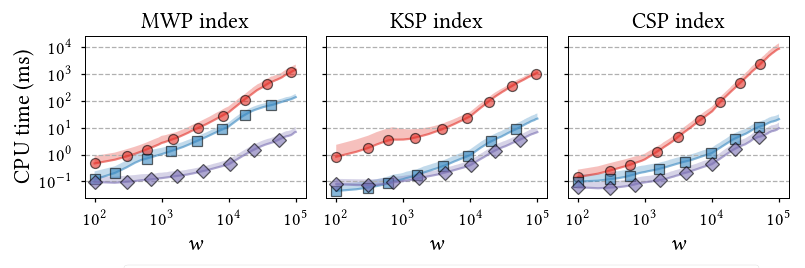

In [20]:
%matplotlib notebook

indexIds = ["CRank", "Rank", "Count"]

f, axarr = plt.subplots(1,len(indexIds), figsize=(9,3), sharex=True, sharey=True)
axes = axarr.flatten()

attributes = ["initcpu", "cpu", "rcpu", "total_avg_cpu"]
attributes = [("cpu", "mean"), ("cpu", "std"), ("rcpu", "mean"), ("rcpu", "std")]

i = 0
for indexId in indexIds: 
    plt.sca(axes[i])

    data = masterdata[masterdata['indexId'] == indexId]
    
    cutoffs = data.groupby("w")["cpu"].quantile([0.10, 0.90]).unstack(level=1)
    data = data.loc[((data["cpu"].values < cutoffs.loc[data["w"], 0.90])).values]
    
    data = data.groupby(["indexId", "w"]).agg(["mean", "std"]).reset_index()
    data = data.sort_values("w")
    data[attributes] = data[attributes].rolling(100, 1).mean()
    
    plt.plot(data["w"], data["cpu"]["mean"],
                 label="Construction",  alpha=0.6, markevery=0.1, markersize=8, markeredgewidth=1, markeredgecolor="black",
             marker=styledictionary[indexId]['marker'], color=styledictionary[indexId]['color'])
    plt.fill_between(data["w"], data["cpu"]["mean"],
                     data["cpu"]["mean"]+data["cpu"]["std"] ,
                     alpha=0.3, facecolor=styledictionary[indexId]['color'])
    
    data = masterdata[masterdata['indexId'] == indexId + "Stream"]
    
    cutoffs = data.groupby("w")["rcpu"].quantile([0.10, 0.90]).unstack(level=1)
    data = data.loc[((data["rcpu"].values < cutoffs.loc[data["w"], 0.90])).values]
    cutoffs = data.groupby("w")["cpu"].quantile([0.10, 0.90]).unstack(level=1)
    data = data.loc[((data["cpu"].values < cutoffs.loc[data["w"], 0.90])).values]
    
    data = data.groupby(["indexId", "w"]).agg(["mean", "std"]).reset_index()
    data = data.sort_values("w")
    data[attributes] = data[attributes].rolling(100, 1).mean()
    
    plt.plot(data["w"], data["rcpu"]["mean"],
                 label="Update (Step 1+2)", alpha=0.6, markevery=0.1, markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker=styledictionary[indexId + "Stream"]['marker'], color=styledictionary[indexId + "Stream"]['color'])
    plt.fill_between(data["w"], data["rcpu"]["mean"],
                     data["rcpu"]["mean"]+data["rcpu"]["std"] ,
                     alpha=0.3, facecolor=styledictionary[indexId + "Stream"]['color'])
    
    plt.plot(data["w"], data["cpu"]["mean"],
                 label="Update (Step 1 only)", alpha=0.6, markevery=0.1, markersize=8, markeredgewidth=1, markeredgecolor="black",
            marker=styledictionary[indexId + "Stream*"]['marker'], color=styledictionary[indexId + "Stream*"]['color'])
    plt.fill_between(data["w"], data["cpu"]["mean"],
                     data["cpu"]["mean"]+data["cpu"]["std"] ,
                     alpha=0.3, facecolor=styledictionary[indexId + "Stream*"]['color'])
    
    plt.yscale("log")
    plt.xscale("log")
    plt.grid(axis="y", linestyle="--")
    plt.xticks([100,1000,10000,100000])
    plt.yticks([0.1,1,10,100, 1000, 10000])
    plt.xlabel("$w$", fontsize = 18)
        
    if i%3 == 0:
        plt.ylabel("CPU time (ms)", fontsize = 18)
    if i < 3:
        plt.title("%s"%prettynames[indexId], fontsize = 18)
    if i == 1:
        plt.legend(fontsize=15, ncol=3, bbox_to_anchor=(2.0,-0.35))
    i += 1
          
plt.tight_layout(h_pad=7)

plt.savefig("plots/Fig7.pdf", bbox_inches='tight')